In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import seaborn as sns

In [2]:
df = pd.read_csv('adult 6.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
# Finding the number of rows and columns:
df.shape

(48842, 15)

In [4]:
# Generating summary statistics of the DataFrame df and rounds the values to the nearest integer
df.describe().round()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.0,48842.0,48842.0,48842.0,48842.0,48842.0
mean,39.0,189664.0,10.0,1079.0,88.0,40.0
std,14.0,105604.0,3.0,7452.0,403.0,12.0
min,17.0,12285.0,1.0,0.0,0.0,1.0
25%,28.0,117550.0,9.0,0.0,0.0,40.0
50%,37.0,178144.0,10.0,0.0,0.0,40.0
75%,48.0,237642.0,12.0,0.0,0.0,45.0
max,90.0,1490400.0,16.0,99999.0,4356.0,99.0


In [5]:
# Finding number of null values 
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [6]:
# Finding null values which are replaced by '?' sign
df.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [7]:
# Handling missing values, replacing with 'unknown'
df = df.replace('?', 'Unknown')

In [8]:
# Check For Missing Values, duplicates and unique 
info = pd.DataFrame(df.isnull().sum(),columns=["IsNull"])
info.insert(1,"IsNa",df.isna().sum(),True)
info.insert(2,"Duplicate",df.duplicated().sum(),True)
info.insert(3,"Unique",df.nunique(),True)
info.T  

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
IsNull,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
IsNa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Duplicate,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52
Unique,74,9,28523,16,16,7,15,6,5,2,123,99,96,42,2


In [9]:
# dropping duplicate values 
df = df.drop_duplicates()
df.shape

(48790, 15)

In [10]:
# Returning an array of unique values present in the education column of df.
df['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [11]:
df['educational-num'].unique()

array([ 7,  9, 12, 10,  6, 15,  4, 13, 14, 16,  3, 11,  5,  8,  2,  1])

Text(0.5, 1.0, 'Histogram')

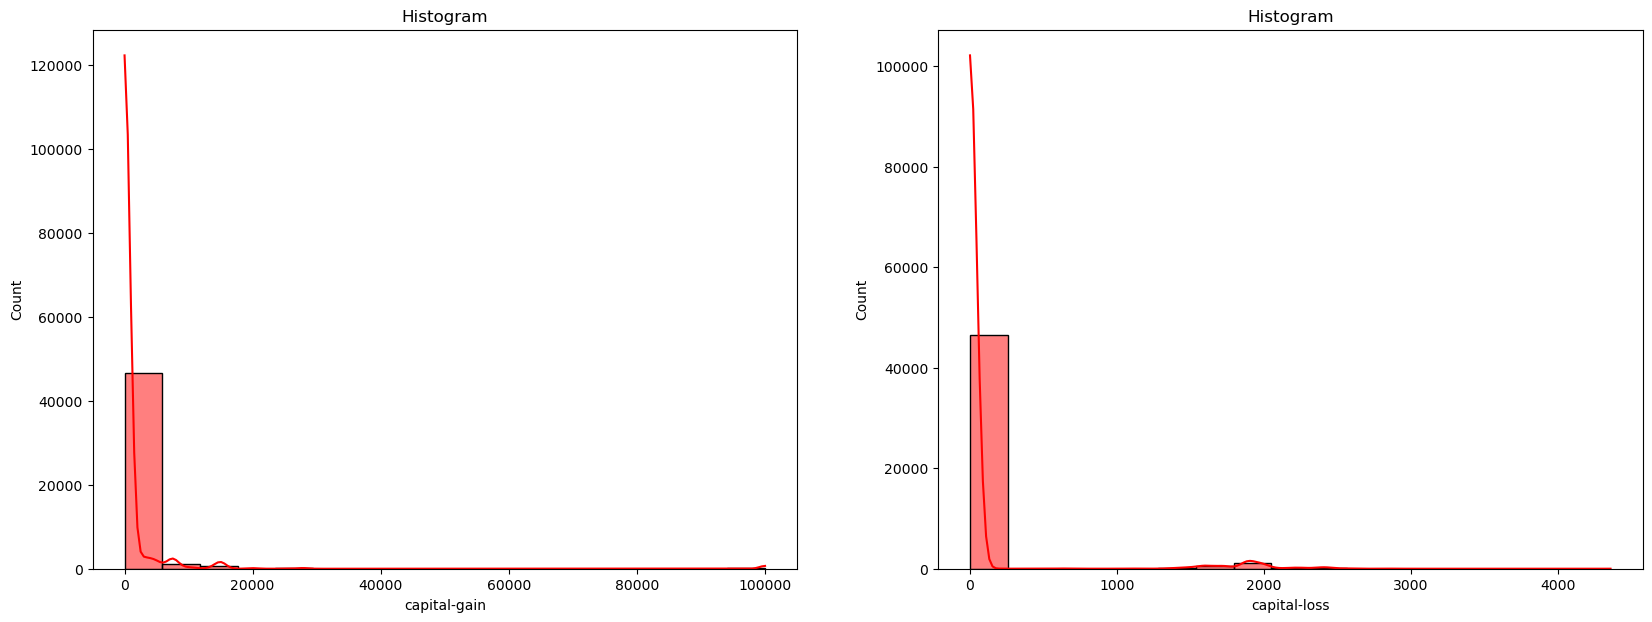

In [12]:
# Histogram distribution of capital_loss and capital_gain
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
sns.histplot(df['capital-gain'], kde = True,color='r')
plt.title('Histogram')
plt.subplot(1, 2, 2)
sns.histplot(df['capital-loss'], kde = True,color='r')
plt.title('Histogram')

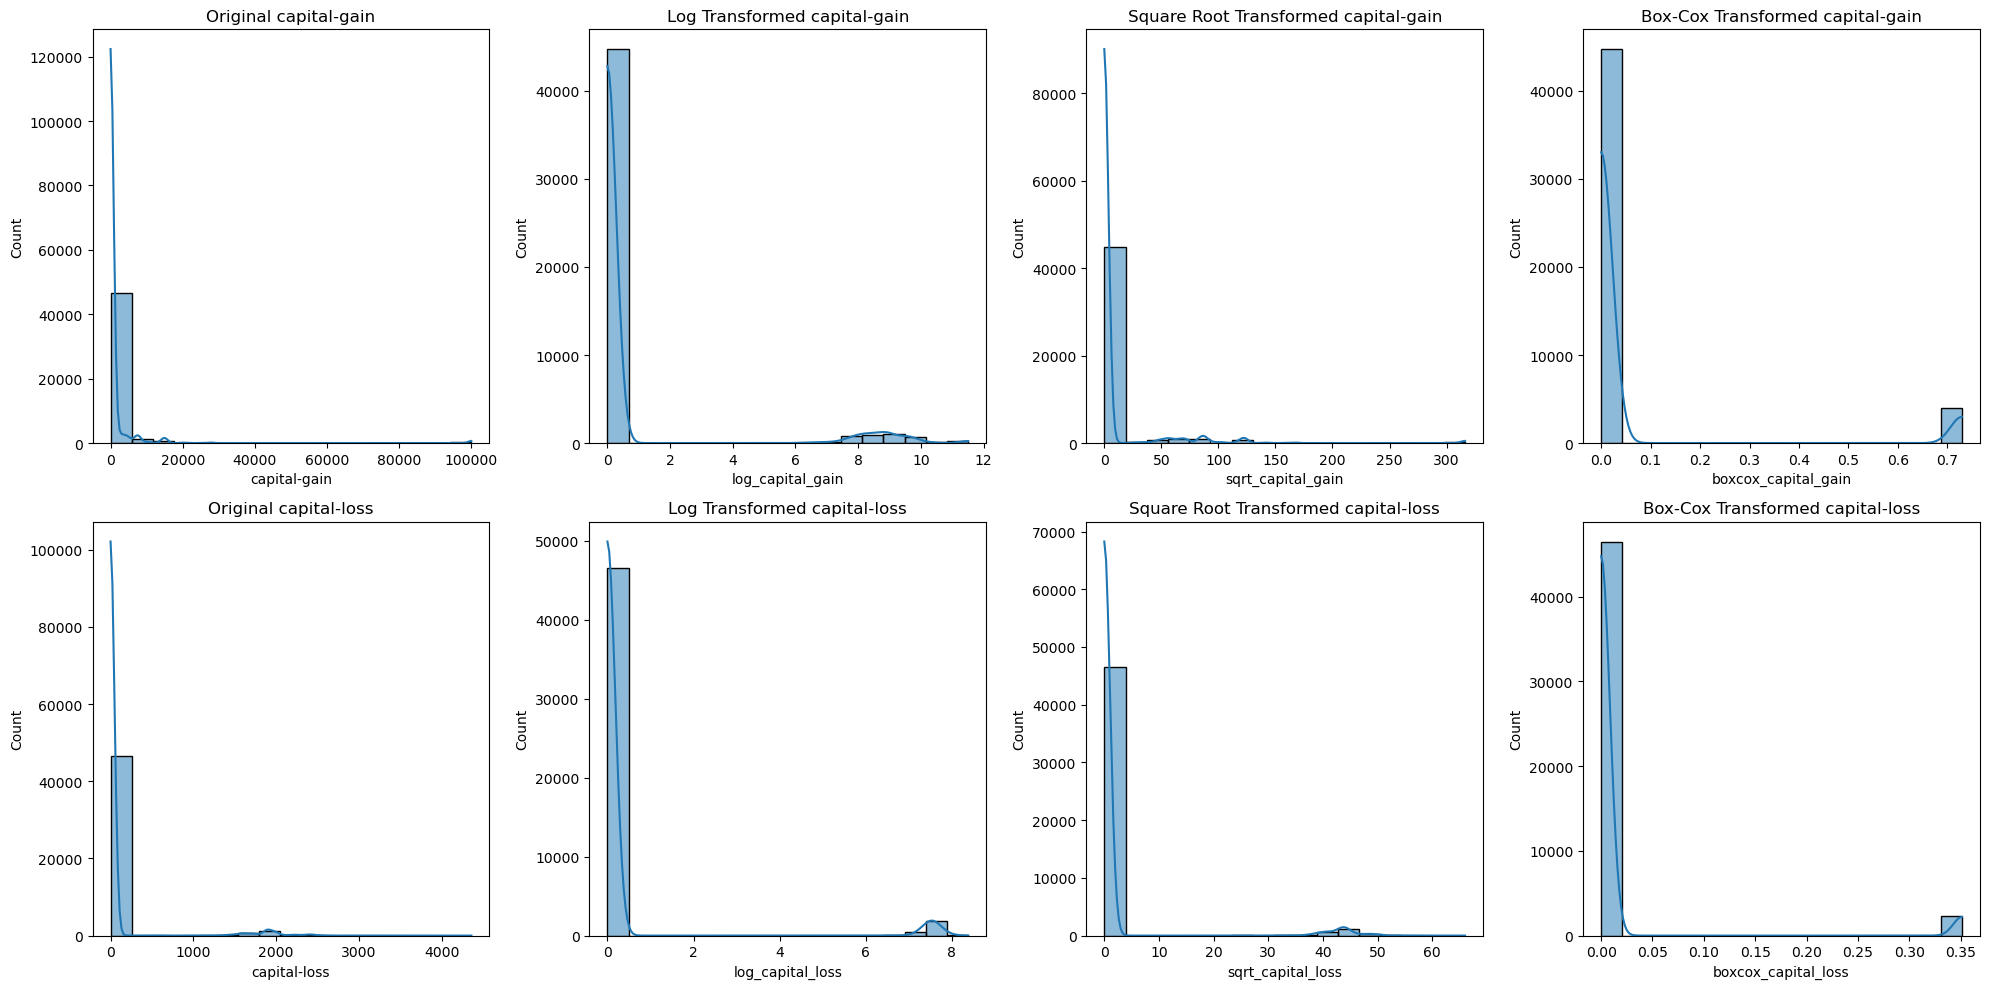

In [13]:
# Handling the skewness in capital-loss and capital-gain:

# Apply Log Transformation
df['log_capital_gain'] = np.log1p(df['capital-gain'])  # log1p handles log(0) cases
df['log_capital_loss'] = np.log1p(df['capital-loss'])

# Apply Square Root Transformation
df['sqrt_capital_gain'] = np.sqrt(df['capital-gain'])
df['sqrt_capital_loss'] = np.sqrt(df['capital-loss'])

# Apply Box-Cox Transformation (requires all positive values)
df['boxcox_capital_gain'], _ = stats.boxcox(df['capital-gain'] + 1)  # +1 to handle zeros
df['boxcox_capital_loss'], _ = stats.boxcox(df['capital-loss'] + 1)  # +1 to handle zeros

# Apply Yeo-Johnson Transformation (can handle zero and negative values)
df['yj_capital_gain'], _ = stats.yeojohnson(df['capital-gain'])
df['yj_capital_loss'], _ = stats.yeojohnson(df['capital-loss'])

# Plot the original and transformed data
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
sns.histplot(df['capital-gain'], kde=True, ax=axes[0, 0]).set_title('Original capital-gain')
sns.histplot(df['log_capital_gain'], kde=True, ax=axes[0, 1]).set_title('Log Transformed capital-gain')
sns.histplot(df['sqrt_capital_gain'], kde=True, ax=axes[0, 2]).set_title('Square Root Transformed capital-gain')
sns.histplot(df['boxcox_capital_gain'], kde=True, ax=axes[0, 3]).set_title('Box-Cox Transformed capital-gain')
sns.histplot(df['capital-loss'], kde=True, ax=axes[1, 0]).set_title('Original capital-loss')
sns.histplot(df['log_capital_loss'], kde=True, ax=axes[1, 1]).set_title('Log Transformed capital-loss')
sns.histplot(df['sqrt_capital_loss'], kde=True, ax=axes[1, 2]).set_title('Square Root Transformed capital-loss')
sns.histplot(df['boxcox_capital_loss'], kde=True, ax=axes[1, 3]).set_title('Box-Cox Transformed capital-loss')
plt.tight_layout()
plt.show()


In [14]:
# Dropping unneccessary variables 
df = df.drop(['educational-num', 'capital-gain', 'capital-loss', 'log_capital_gain', 'sqrt_capital_gain', 'boxcox_capital_gain', 'yj_capital_loss', 'log_capital_loss', 'sqrt_capital_loss' ,'boxcox_capital_loss', 'yj_capital_gain'], axis=1)

In [15]:
# Count the number of samples in each income group
income_counts = df['income'].value_counts()
income_counts

income
<=50K    37109
>50K     11681
Name: count, dtype: int64

In [16]:
# Balancing dataset using combination of oversampling and undersampling
#from imblearn.combine import SMOTEENN

#smote_enn = SMOTEENN(random_state=42)
#X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)


In [17]:
# Percentage of low income based on thier marital status:

# Count the number of samples in each income group by marital status
income_counts = df.groupby(['marital-status', 'income']).size().unstack(fill_value=0)

# Calculate the percentage of low-income samples (<=50K) for each marital status
income_counts['Percentage_Low_Income'] = (income_counts['<=50K'] / income_counts.sum(axis=1)) * 100
income_counts['Percentage_Low_Income'] = income_counts['Percentage_Low_Income'].round(2)
income_counts[['<=50K', '>50K', 'Percentage_Low_Income']]


income,<=50K,>50K,Percentage_Low_Income
marital-status,,,
Divorced,5959,671,89.88
Married-AF-spouse,23,14,62.16
Married-civ-spouse,12388,9978,55.39
Married-spouse-absent,569,58,90.75
Never-married,15349,733,95.44
Separated,1431,99,93.53
Widowed,1390,128,91.57


income  <=50K  >50K
gender             
Female  14407  1769
Male    22702  9912


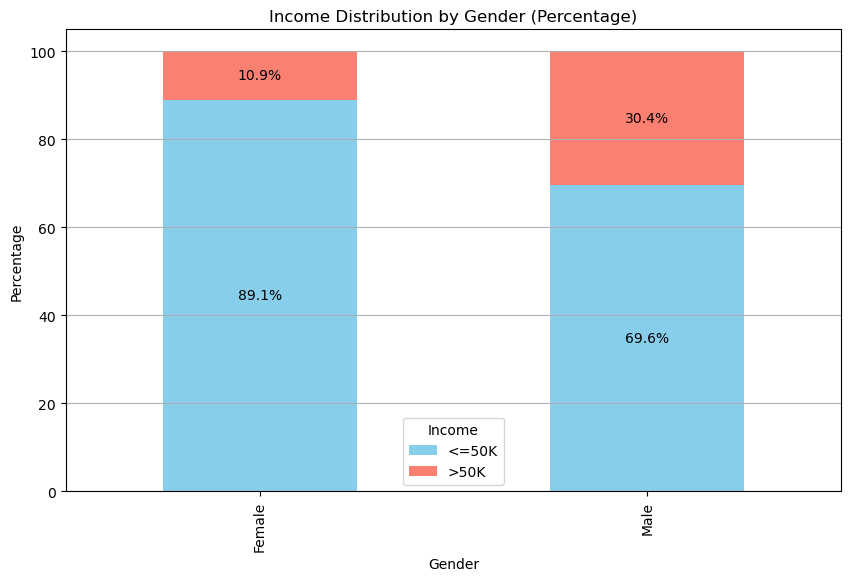

In [18]:
# Finding the relationship between the sex of people and thier income class

gender_income_counts = df.groupby(['gender', 'income']).size().reset_index(name='count')
gender_income_pivot = gender_income_counts.pivot(index='gender', columns='income', values='count')
print(gender_income_pivot)

# Calculate percentages
gender_income_percentage = gender_income_pivot.div(gender_income_pivot.sum(axis=1), axis=0) * 100

# Plotting
ax = gender_income_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('Income Distribution by Gender (Percentage)')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend(title='Income')
plt.grid(axis='y')

# Adding percentage labels on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x + width / 2, y + height / 2, '{:.1f}%'.format(height), ha='center', va='center')

plt.show()


In [19]:
# Finding the percentage of people who have >50k income are native American and who are not


high_income = df[df['income'] == '>50K']
native_american_count = high_income[high_income['native-country'] == 'United-States'].shape[0]


total_high_income_count = high_income.shape[0]

# Calculate the percentages
native_american_percentage = (native_american_count / total_high_income_count) * 100
non_native_american_percentage = 100 - native_american_percentage

print(f"Percentage of people with >50K income who are native American: {native_american_percentage:.2f}%")
print(f"Percentage of people with >50K income who are not native American: {non_native_american_percentage:.2f}%")


Percentage of people with >50K income who are native American: 91.50%
Percentage of people with >50K income who are not native American: 8.50%


/var/folders/q0/54d0yrqj2dz0f0nfww0g5x1r0000gn/T/ipykernel_15513/127747577.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_income['education_level'] = high_income['education'].apply(


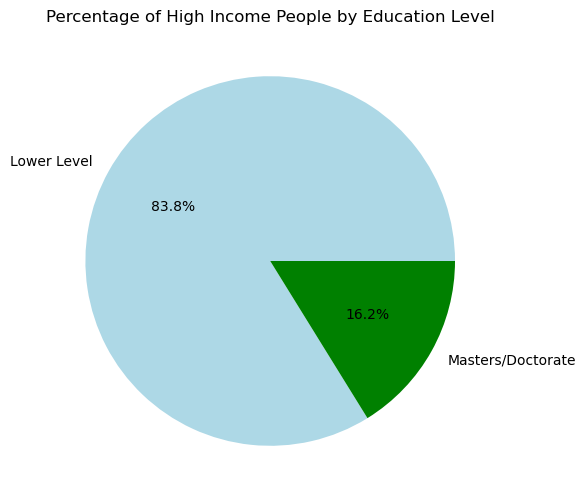

education_level
Lower Level          83.819878
Masters/Doctorate    16.180122
Name: count, dtype: float64


In [20]:
# Finding the percentage of people with >50K income and education level of Masters or Doctorate

high_income = df[df['income'] == '>50K']

# Categorize education levels
high_income['education_level'] = high_income['education'].apply(
    lambda x: 'Masters/Doctorate' if x in ['Masters', 'Doctorate'] else 'Lower Level'
)

# Count the occurrences of each category
education_counts = high_income['education_level'].value_counts()

# Calculate the percentages
education_percentages = education_counts / education_counts.sum() * 100


plt.figure(figsize=(8, 6))
education_percentages.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'green'])
plt.title('Percentage of High Income People by Education Level')
plt.ylabel('')  
plt.show()

print(education_percentages)

This graph shows a positive relationship between age and income, suggesting that as age increases, the likelihood of having a higher income also increases. The regression line indicates a trend, but the binary nature of the income data (0 or 1) makes the relationship appear less continuous.

In [21]:
# Converting categorical features to numberical/encoding using label encoding 
label_encoder = preprocessing.LabelEncoder()

df['gender'] = label_encoder.fit_transform(df['gender'])
df['workclass'] = label_encoder.fit_transform(df['workclass'])
df['education'] = label_encoder.fit_transform(df['education'])
df['marital-status'] = label_encoder.fit_transform(df['marital-status'])
df['occupation'] = label_encoder.fit_transform(df['occupation'])
df['relationship'] = label_encoder.fit_transform(df['relationship'])
df['race'] = label_encoder.fit_transform(df['race'])
df['native-country'] = label_encoder.fit_transform(df['native-country'])
df['income'] = label_encoder.fit_transform(df['income'])


df.head()


,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,3,226802,1,4,6,3,2,1,40,38,0
1,38,3,89814,11,2,4,0,4,1,50,38,0
2,28,1,336951,7,2,10,0,4,1,40,38,1
3,44,3,160323,15,2,6,0,2,1,40,38,1
4,18,7,103497,15,4,14,3,4,0,30,38,0


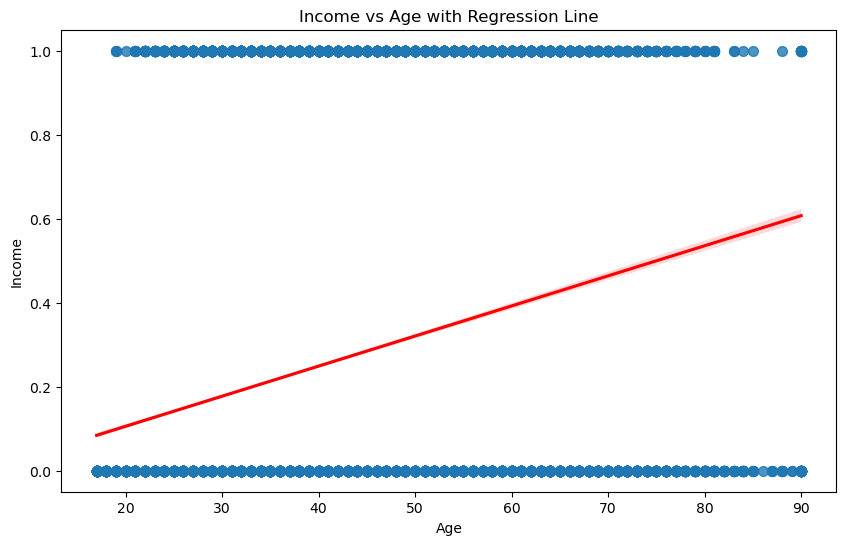

In [22]:
# Finding how income is changed when age is higher?
plt.figure(figsize=(10, 6))
sns.regplot(x='age', y='income', data=df, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Income vs Age with Regression Line')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

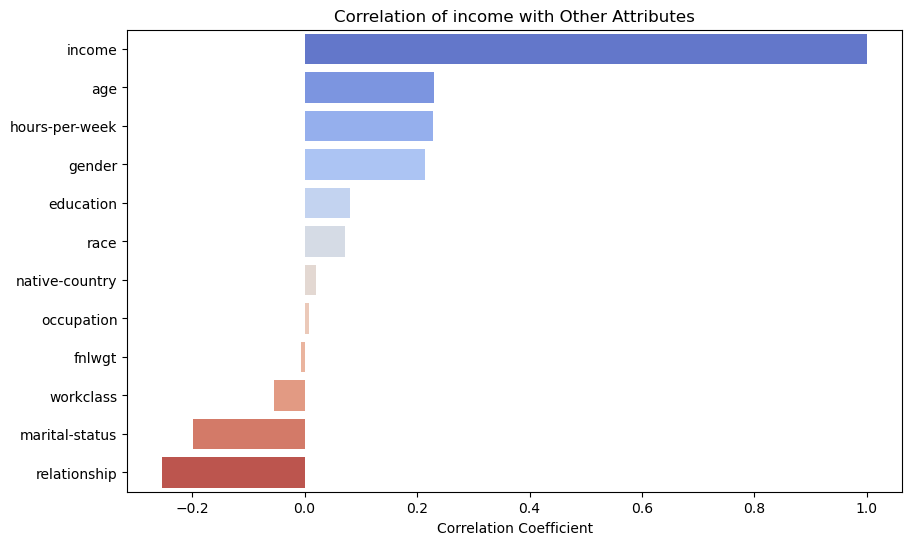

income            1.000000
age               0.230144
hours-per-week    0.227664
gender            0.214639
education         0.080118
race              0.070970
native-country    0.020169
occupation        0.007275
fnlwgt           -0.006309
workclass        -0.054634
marital-status   -0.198855
relationship     -0.253175
Name: income, dtype: float64


In [23]:
# Calculating the correlation of the 'income' attribute with other attributes in the DataFrame, 
# sorts the correlations, and then visualizes these correlations using a bar plot.

corr_matrix = df.corr()

# Specify the attribute for which you want to find correlations
attribute = 'income'

# Extract correlations for the specified attribute
correlation_with_attribute = corr_matrix[attribute].sort_values(ascending=False)

# Plot the correlations with the specified attribute
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_attribute.values, y=correlation_with_attribute.index, palette='coolwarm')
plt.title(f'Correlation of {attribute} with Other Attributes')
plt.xlabel('Correlation Coefficient')
plt.show()


print(correlation_with_attribute)